In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hddm

C:\Users\Tejas\anaconda3\lib\site-packages\IPython\parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [4]:
data = hddm.load_csv('RTs.csv')
errors = hddm.load_csv('Curvature_Errors.csv')

In [5]:
errors

,Unnamed: 0,Participant_Id,Block,Trial,Rotation,Emphasis,Errors
0,0,0,0,0,Sudden,Speed,0.138321
1,1,0,0,1,Sudden,Speed,0.166995
2,2,0,0,2,Sudden,Speed,0.200216
3,3,0,0,3,Sudden,Speed,0.209680
4,4,0,0,4,Sudden,Speed,0.186858
...,...,...,...,...,...,...,...
46075,46075,59,11,763,Gradual,Accuracy,0.304955
46076,46076,59,11,764,Gradual,Accuracy,0.309475
46077,46077,59,11,765,Gradual,Accuracy,0.316315
46078,46078,59,11,766,Gradual,Accuracy,0.318811


In [9]:
data['response'] = (errors['Errors'] < 20/90).astype(int)

In [14]:
data = data.rename(columns={'Participant_Id':'subj_idx', 'ITs':'rt'})

In [22]:
m = hddm.HDDM(data, 
              depends_on = {'v': ['Block', 'Rotation', 'Emphasis'],
                            'b': ['Block', 'Rotation', 'Emphasis']},
              p_outlier = 0.05
             )

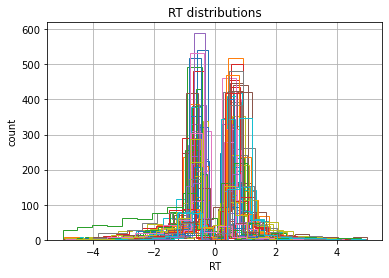

In [23]:
data1 = hddm.utils.flip_errors(data[data['rt'] < 5])

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [24]:
m.find_starting_values()

C:\Users\Tejas\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [26]:
m.sample(5000, 1000)

 [-                 2%                  ] 133 of 5000 complete in 688.7 secHalting at iteration  132  of  5000
Could not generate output statistics for v_subj(7.Speed.Sudden).8
Could not generate output statistics for v_subj(7.Speed.Gradual).2
Could not generate output statistics for v_subj(7.Speed.Gradual).38
Could not generate output statistics for t_subj.0
Could not generate output statistics for t_subj.51
Could not generate output statistics for v_subj(7.Speed.Sudden).0
Could not generate output statistics for v_subj(7.Speed.Gradual).22
Could not generate output statistics for v_subj(7.Speed.Gradual).26
Could not generate output statistics for v_subj(0.Speed.Sudden).0
Could not generate output statistics for v_subj(0.Speed.Sudden).4
Could not generate output statistics for t_subj.55
Could not generate output statistics for v_subj(0.Speed.Sudden).8
Could not generate output statistics for t_subj.57
Could not generate output statistics for v_subj(7.Speed.Sudden).32
Could not generate

Could not generate output statistics for v_subj(5.Accuracy.Gradual).59
Could not generate output statistics for v_subj(8.Speed.Sudden).48
Could not generate output statistics for v_subj(9.Accuracy.Sudden).41
Could not generate output statistics for v_subj(9.Accuracy.Gradual).19
Could not generate output statistics for v_subj(9.Speed.Gradual).10
Could not generate output statistics for v_subj(9.Accuracy.Gradual).23
Could not generate output statistics for v_subj(9.Speed.Gradual).14
Could not generate output statistics for v_subj(9.Accuracy.Sudden).13
Could not generate output statistics for v_subj(9.Speed.Sudden).4
Could not generate output statistics for v_subj(5.Accuracy.Gradual).27
Could not generate output statistics for v_subj(9.Accuracy.Sudden).1
Could not generate output statistics for v_subj(9.Speed.Gradual).54
Could not generate output statistics for v_subj(4.Speed.Sudden).44
Could not generate output statistics for v_subj(9.Accuracy.Gradual).31
Could not generate output statis

Could not generate output statistics for v_subj(6.Speed.Sudden).16
Could not generate output statistics for v_subj(11.Accuracy.Sudden).57
Could not generate output statistics for v_subj(1.Accuracy.Gradual).11
Could not generate output statistics for v_subj(2.Speed.Gradual).50
Could not generate output statistics for v_subj(3.Speed.Sudden).20
Could not generate output statistics for v_subj(6.Speed.Gradual).38
Could not generate output statistics for v_subj(11.Accuracy.Sudden).17
Could not generate output statistics for v_subj(1.Accuracy.Gradual).15
Could not generate output statistics for v_subj(2.Speed.Gradual).54
Could not generate output statistics for v_subj(3.Speed.Sudden).24
Could not generate output statistics for v_subj(1.Accuracy.Gradual).19
Could not generate output statistics for v_subj(3.Speed.Sudden).28
Could not generate output statistics for v_subj(6.Speed.Gradual).42
Could not generate output statistics for v_subj(2.Speed.Gradual).58
Could not generate output statistics 

Could not generate output statistics for v_subj(10.Speed.Sudden).40
Could not generate output statistics for v_subj(1.Speed.Gradual).10
Could not generate output statistics for v_subj(1.Speed.Sudden).28
Could not generate output statistics for v_subj(11.Accuracy.Gradual).7
Could not generate output statistics for v_subj(5.Speed.Gradual).58
Could not generate output statistics for v_subj(3.Accuracy.Gradual).31
Could not generate output statistics for v_subj(6.Accuracy.Sudden).1
Could not generate output statistics for v_subj(6.Accuracy.Sudden).25
Could not generate output statistics for v_subj(1.Accuracy.Sudden).13
Could not generate output statistics for v_subj(10.Speed.Sudden).24
Could not generate output statistics for v_subj(1.Speed.Sudden).32
Could not generate output statistics for v_subj(2.Speed.Sudden).56
Could not generate output statistics for v_subj(10.Speed.Sudden).28
Could not generate output statistics for v_subj(5.Accuracy.Gradual).35
Could not generate output statistics 

Could not generate output statistics for v_subj(4.Accuracy.Gradual).31
Could not generate output statistics for v_subj(1.Speed.Gradual).26
Could not generate output statistics for v_subj(4.Accuracy.Gradual).35
Could not generate output statistics for v_subj(1.Speed.Gradual).30
Could not generate output statistics for v_subj(4.Accuracy.Gradual).39
Could not generate output statistics for v_subj(1.Speed.Gradual).34
Could not generate output statistics for v_subj(1.Speed.Sudden).12
Could not generate output statistics for v_subj(0.Accuracy.Gradual).7
Could not generate output statistics for v_subj(4.Accuracy.Gradual).59
Could not generate output statistics for v_subj(5.Accuracy.Gradual).31
Could not generate output statistics for v_subj(0.Accuracy.Gradual).11
Could not generate output statistics for v(0.Accuracy.Gradual)
Could not generate output statistics for v_subj(1.Speed.Sudden).8
Could not generate output statistics for v_subj(4.Accuracy.Sudden).9
Could not generate output statistic

Could not generate output statistics for v_subj(10.Accuracy.Gradual).15
Could not generate output statistics for v_subj(2.Speed.Gradual).38
Could not generate output statistics for v_subj(4.Speed.Sudden).40
Could not generate output statistics for v(11.Accuracy.Sudden)
Could not generate output statistics for v_subj(10.Accuracy.Gradual).11
Could not generate output statistics for v_subj(10.Accuracy.Sudden).29
Could not generate output statistics for v(11.Speed.Gradual)
Could not generate output statistics for v_subj(4.Speed.Sudden).36
Could not generate output statistics for v_subj(2.Accuracy.Sudden).25
Could not generate output statistics for v(11.Speed.Sudden)
Could not generate output statistics for v_subj(2.Accuracy.Sudden).17
Could not generate output statistics for v_subj(10.Speed.Gradual).10
Could not generate output statistics for v_subj(2.Accuracy.Sudden).33
Could not generate output statistics for v_subj(2.Speed.Gradual).26
Could not generate output statistics for v_subj(4.Sp

TypeError: 'NoneType' object is not subscriptable